# Biodiversity in Parks
Portfolio Project written by Gustavo Llanos to analyze and interpret data from the National Parks Service about endangered species in different parks.
## Project Objectives
- Perform some data analysis on the conservation statuses of species 
- Investigate if there are any patterns or themes to the types of species that become endangered
- Analyze, clean up, and plot data
## Overview of the Data
- The data consists of two datasets:
- `Observations.csv` that contains the following variables:
    - `scientific_name` Scientific designation of a particual species
    - `park_name` National Park where is was observed
    -  `observations` Amount of observations
- `species_info.csv` that contains the following variables:
    - `category` Categorical classification of the species
    - `scientific_name` Scientific designation of a particual species
    - `common_names` Common name or non-scientific name
    - `conservation_status` Status of conservation
## Method & Analysis
- Data Load, Cleaning & Analysis
- Initial Assessment 
- Detailed Analysis

### Data Load, Cleaning & Analysis

In [15]:
#import libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import glob

#read csv file into a dataframe
observations_data = pd.read_csv('observations.csv')
species_data = pd.read_csv('species_info.csv')

#print general info about the datasets
print('Observations Data Info')
print('----------------------')
print(observations_data.info(), '\n')
print('Species_info:')
print('-------------')
print(species_data.info(),'\n')

Observations Data Info
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None 

Species_info:
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None 



In [16]:
# Merge the two dataframes on 'scientific_name'
all_data = pd.merge(observations_data, species_data, on='scientific_name', how='left')
display(all_data.head())
print('All Data Merged Info:')
print('---------------------')
(all_data.info(),'\n')
print('All Data Merged Description:')
print('----------------------------')
display(all_data.describe(include='all'))

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN


All Data Merged Info:
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
All Data Merged Description:
----------------------------


,scientific_name,park_name,observations,category,common_names,conservation_status
count,25632,25632,25632.000000,25632,25632,880
unique,5541,4,NaN,7,5504,4
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN,Vascular Plant,Dicranum Moss,Species of Concern
freq,36,6408,NaN,19560,28,732
mean,NaN,NaN,142.214693,NaN,NaN,NaN
std,NaN,NaN,69.912475,NaN,NaN,NaN
min,NaN,NaN,9.000000,NaN,NaN,NaN
25%,NaN,NaN,86.000000,NaN,NaN,NaN
50%,NaN,NaN,124.000000,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,NaN,NaN


In [17]:
# Identify unique values in parks, categories and conservation_status
print(all_data['park_name'].unique())
print(all_data['category'].unique())
print(all_data['conservation_status'].unique())

# Contingency table for park_name and conservation_status
display(pd.crosstab(all_data['park_name'], all_data['conservation_status'], values=all_data['observations'],aggfunc='count', margins=True))

# Contingency table for category and conservation_status
display(pd.crosstab(all_data['category'], all_data['conservation_status'], values=all_data['observations'],aggfunc='count', margins=True))


['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']
[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


conservation_status,Endangered,In Recovery,Species of Concern,Threatened,All
park_name,,,,,
Bryce National Park,20,6,183,11,220
Great Smoky Mountains National Park,20,6,183,11,220
Yellowstone National Park,20,6,183,11,220
Yosemite National Park,20,6,183,11,220
All,80,24,732,44,880


conservation_status,Endangered,In Recovery,Species of Concern,Threatened,All
category,,,,,
Amphibian,4.0,NaN,16.0,8.0,28
Bird,16.0,12.0,320.0,NaN,348
Fish,12.0,NaN,16.0,20.0,48
Mammal,44.0,12.0,168.0,8.0,232
Nonvascular Plant,NaN,NaN,20.0,NaN,20
Reptile,NaN,NaN,20.0,NaN,20
Vascular Plant,4.0,NaN,172.0,8.0,184
All,80.0,24.0,732.0,44.0,880


In [127]:
# Replace Long names of parks with short names in the park_name column
replace_dict = {'Great Smoky Mountains National Park': 'Smokymt', 'Yosemite National Park': 'Yosemite', 'Bryce National Park': 'Bryce', 'Yellowstone National Park': 'Yellowstone'}
for key, value in replace_dict.items():
    all_data['park_name'] = all_data['park_name'].replace(key, value)
display(all_data.head())

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Smokymt,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Smokymt,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Smokymt,85,Vascular Plant,Common Bluecup,NaN


- The contingency table show that almost all categories of species have at least 1 species of concern but not all of them are Threatned or Endangered
- The category Mammals shows the highest amount of endangered species followed up by bird with 16 and fish with 12. 

### Initial Assesment of all the data

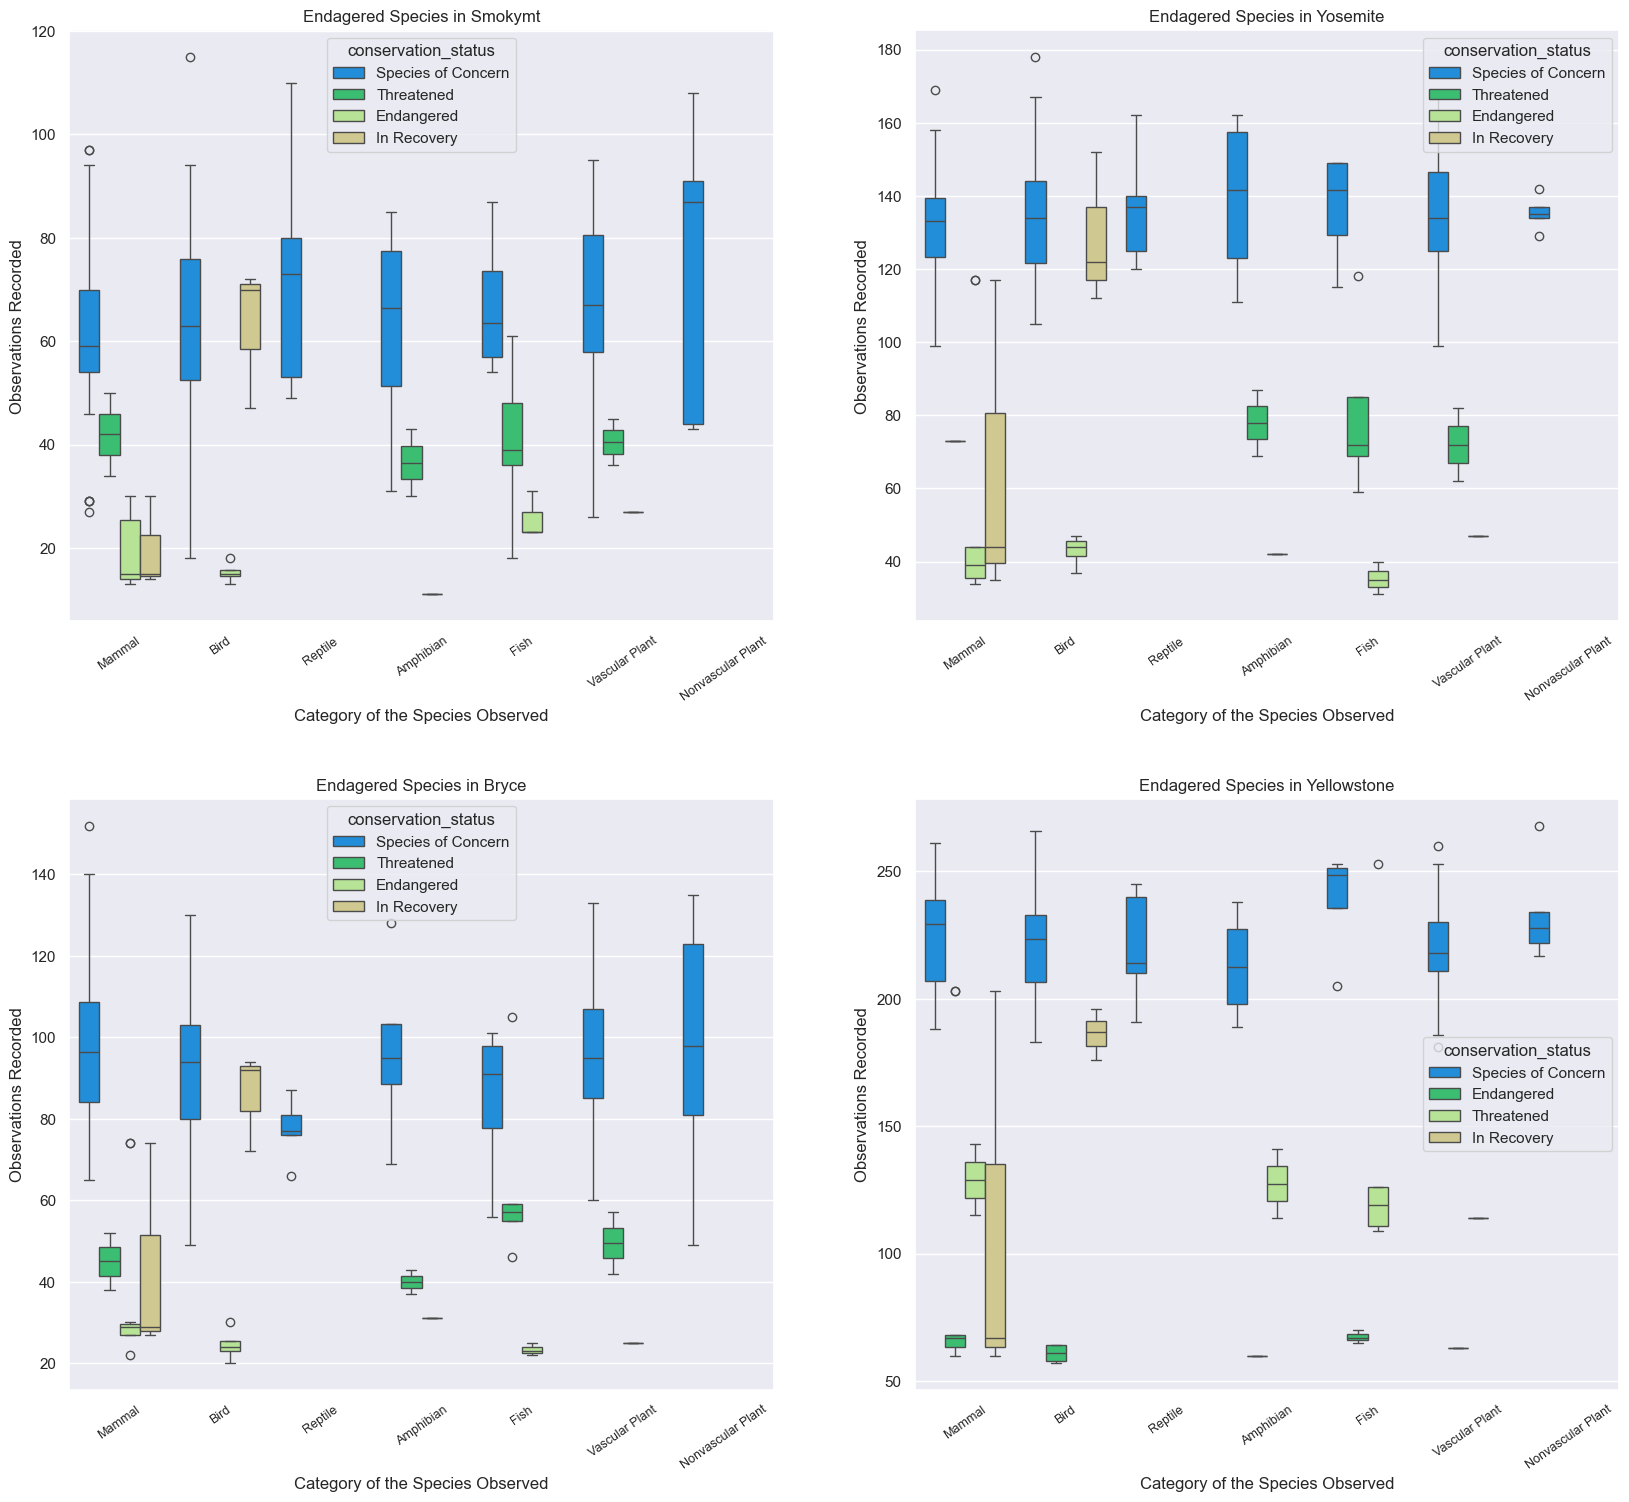

<Figure size 640x480 with 0 Axes>

In [21]:
#set theme for the seaborn plots
sn.set_theme(context='notebook', style='darkgrid', palette='terrain', font='sans-serif', font_scale=1, color_codes=True, rc=None)
#plotting the endagered species
plt.figure(figsize=(20,20))
counter = 1
#set the x labels for the plots
order = ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant']
#loop through the unique values in park_name and plot the boxplots
for items in all_data['park_name'].unique():
    ax = plt.subplot(2,2,counter)
    park_data = all_data[all_data.park_name == items]
    sn.boxplot(data=park_data, x='category', y='observations', hue='conservation_status', order=order)
    plt.xticks(rotation=35, fontsize=9)
    plt.title(f'Endagered Species in {items}')
    plt.ylabel('Observations Recorded')
    plt.xlabel(f'Category of the Species Observed')
    counter = counter +1
plt.subplots_adjust(wspace = 0.2, hspace= 0.3, bottom = 0.2)
plt.show()
plt.clf()

- The boxplots show that there are some differences between the parks and the amount of observations in the different status. However, the tendency of higher observations in mammals, birds and fish is still observed
- THe following analysis will be focused in each conservation status and on the Endangered and Threatened Species

### Endanreged & Threatened Species

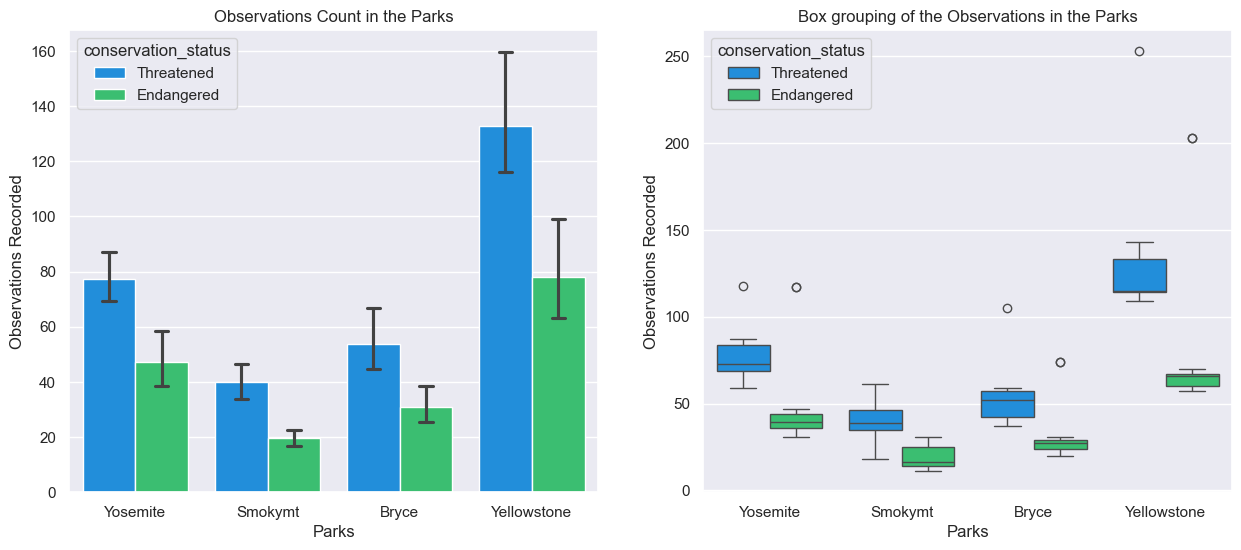

<Figure size 640x480 with 0 Axes>

In [128]:
#Analyze data by park and endanreged species
plt.figure(figsize=(15,6))
park_data_TE = all_data[((all_data.conservation_status == 'Endangered') | (all_data.conservation_status == 'Threatened'))]
#plot the observations distribution in the parks for the endagered species and threatened species
plt.subplot(1,2,1)
#capsize is used to add error bars to the barplot
sn.barplot(data=park_data_TE, x='park_name', y='observations', hue='conservation_status', capsize=0.2)
plt.title(f'Observations Count in the Parks')
plt.xlabel('Parks')
plt.ylabel('Observations Recorded')
#plot the observations distribution in the parks for the endagered species and threatened species
plt.subplot(1,2,2)
sn.boxplot(data=park_data_TE, x='park_name', y='observations', hue='conservation_status')
plt.title(f'Box grouping of the Observations in the Parks')
plt.xlabel('Parks')
plt.ylabel('Observations Recorded')
plt.show()
plt.clf()


- The countplot bars shows that the Yellowstone park is the park with most Threatened species observed as well as Endangered.
- Additionally, the boxplot also confirms that the amount of observed species in these two categories is much more than in the other parks. It is worth mention that two ouliers are observed in the observations that show observations recorded over 200

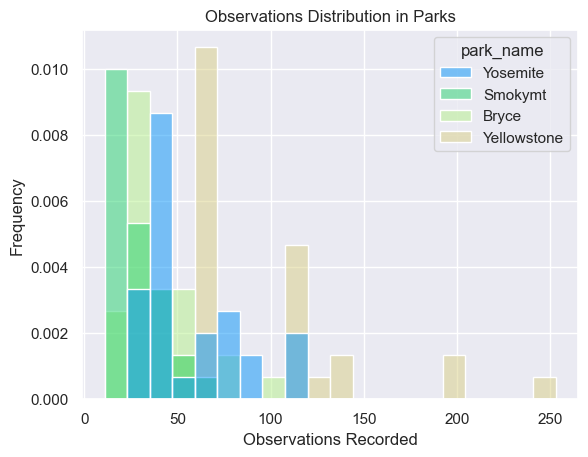

<Figure size 640x480 with 0 Axes>

In [129]:
#Analyze data by park and categories of species
#Stat = density is used to plot the density of the observations
sn.histplot(data=park_data_TE, x='observations', hue='park_name', stat="density", bins=20)
plt.title(f'Observations Distribution in Parks')
plt.xlabel('Observations Recorded')
plt.ylabel('Frequency')
plt.show()
plt.clf()

- The histogram of observations are highly skewed to the right. No normal distribution is observed nor similarities in the distributions.
- The irregularities and differences between each park does not allow to make a proper analysis with all the parks. An analysis per park may provide better insigths 

In [132]:
#Analyze data by park and conservation status with a contingency table
xtab_TE = pd.crosstab(park_data_TE['park_name'], park_data_TE['conservation_status'], values=park_data_TE['observations'], aggfunc='sum')
display(xtab_TE)

conservation_status,Endangered,Threatened
park_name,,
Bryce,619,591
Smokymt,393,440
Yellowstone,1558,1459
Yosemite,943,849


conservation_status,Endangered,Threatened
scientific_name,,
Anaxyrus canorus,NaN,114.0
Canis lupus,660.0,NaN
Canis rufus,60.0,NaN
Chasmistes liorus,65.0,NaN
Erimonax monachus,NaN,109.0
Etheostoma percnurum,70.0,NaN
Geum radiatum,63.0,NaN
Glaucomys sabrinus coloratus,67.0,NaN
Grus americana,57.0,NaN


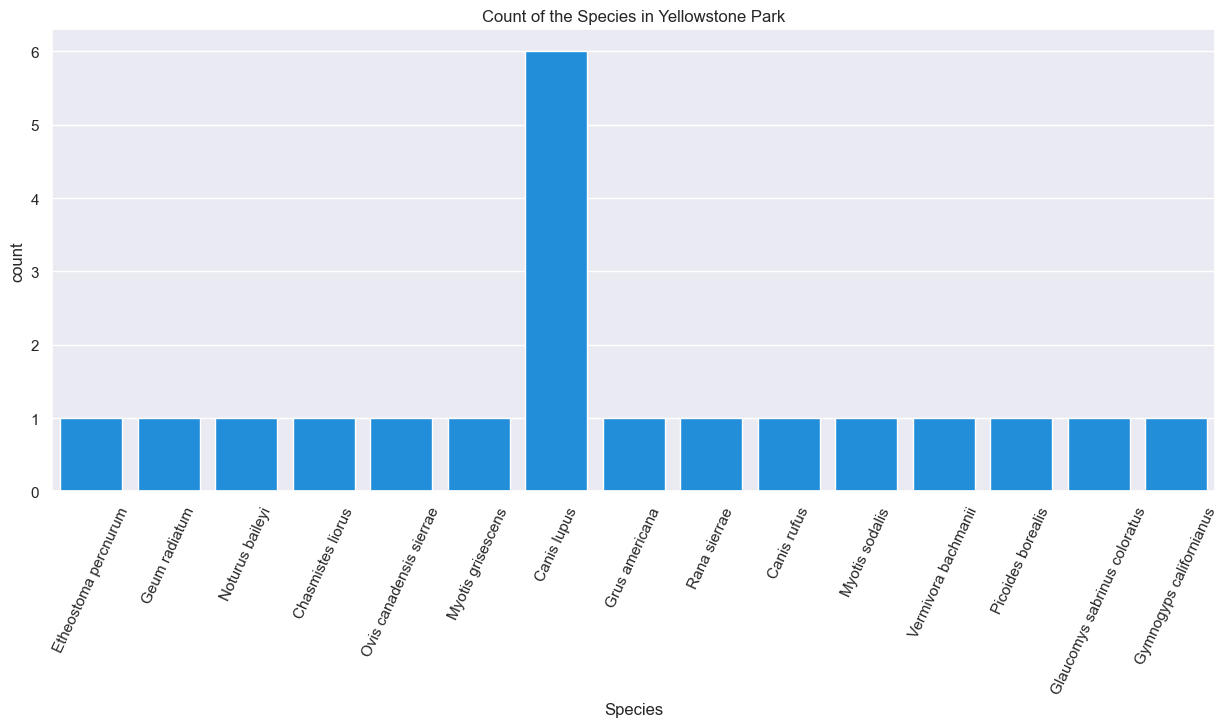

<Figure size 640x480 with 0 Axes>

In [159]:
# create a df for the yellowstone park and analyze the data
data_yellowstone = park_data_TE[park_data_TE.park_name == 'Yellowstone']
# create a contingency table for the yellowstone park and the common names of the species
data_yellowstone_contingency = pd.crosstab(data_yellowstone['scientific_name'], data_yellowstone['conservation_status'], values=data_yellowstone['observations'], aggfunc='sum')
display(data_yellowstone_contingency)
# Create countplot for the species in Yellowstone
plt.figure(figsize=(15,6))
sn.countplot(data=data_yellowstone[data_yellowstone.conservation_status =='Endangered'], x='scientific_name', capsize=0.2)
plt.xticks(rotation=65, fontsize=11)
plt.title(f'Count of the Species in Yellowstone Park')
plt.xlabel('Species')
plt.show()
plt.clf()

In [160]:
#find the common name of the most endangered species in yellowstone
Canis_lups = data_yellowstone[data_yellowstone.scientific_name == 'Canis lupus'].common_names
print(Canis_lups)


11313          Gray Wolf
11315    Gray Wolf, Wolf
12031          Gray Wolf
12033    Gray Wolf, Wolf
14812          Gray Wolf
14814    Gray Wolf, Wolf
Name: common_names, dtype: object


- The analysis above shows that in the Yellowstone the most endangered species of the park is the Canis Lupus. Also known as a Gray Wolf.  

### Detailed Analysis

- The dataset contains a lot of data for each park which makes it difficult to plot in one single set of plots. 
- A detalied analysis per park is necessary

In [46]:
for park in all_data['park_name'].unique():
    park_data = all_data[all_data['park_name'] == park]
    cross_tab = pd.crosstab(park_data['conservation_status'], park_data['category'], values=park_data['observations'], aggfunc='sum')
    print(f"Cross Tab for {park}:")
    display(cross_tab)
    print("\n")

Cross Tab for Smokymt:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,11.0,61.0,77.0,217.0,NaN,NaN,27.0
In Recovery,NaN,189.0,NaN,59.0,NaN,NaN,NaN
Species of Concern,249.0,5047.0,268.0,2591.0,373.0,365.0,2842.0
Threatened,73.0,NaN,202.0,84.0,NaN,NaN,81.0




Cross Tab for Yosemite:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,42.0,172.0,106.0,576.0,NaN,NaN,47.0
In Recovery,NaN,386.0,NaN,196.0,NaN,NaN,NaN
Species of Concern,556.0,10735.0,547.0,5546.0,677.0,684.0,5794.0
Threatened,156.0,NaN,403.0,146.0,NaN,NaN,144.0




Cross Tab for Bryce:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,31.0,98.0,70.0,395.0,NaN,NaN,25.0
In Recovery,NaN,258.0,NaN,130.0,NaN,NaN,NaN
Species of Concern,387.0,7252.0,339.0,4086.0,486.0,387.0,4074.0
Threatened,80.0,NaN,322.0,90.0,NaN,NaN,99.0




Cross Tab for Yellowstone:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,60.0,243.0,202.0,990.0,NaN,NaN,63.0
In Recovery,NaN,559.0,NaN,330.0,NaN,NaN,NaN
Species of Concern,852.0,17724.0,955.0,9452.0,1169.0,1100.0,9425.0
Threatened,255.0,NaN,718.0,258.0,NaN,NaN,228.0


c:\Users\cuate\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\cuate\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


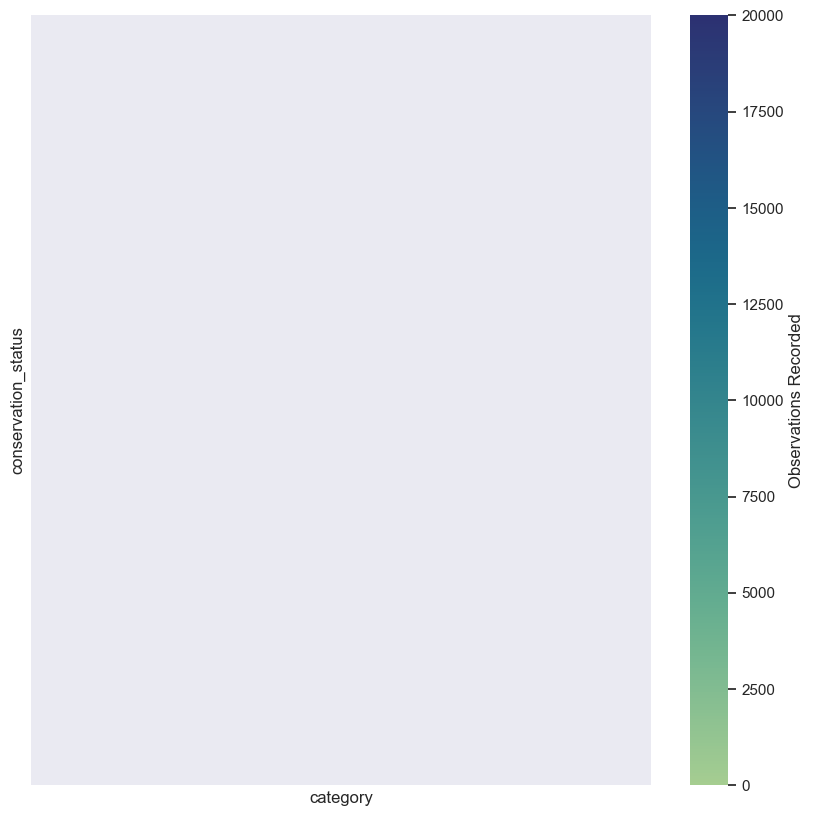

<Figure size 640x480 with 0 Axes>

In [47]:
vmin = 0
vmax = 20000
#plotting the cross tab for Yellowstone National Park
plt.figure(figsize=(10,10))
df_park = all_data[all_data['park_name'] == 'Yellowstone National Park']
pd_cross_tab = pd.crosstab(df_park['conservation_status'], all_data['category'], values=all_data['observations'], aggfunc='sum')
sn.heatmap(pd_cross_tab,annot=True, fmt='g', cbar_kws={"label": "Observations Recorded"}, cmap='crest', vmin=vmin, vmax=vmax)
plt.xticks(rotation=35, fontsize=9)
plt.yticks(rotation=45, fontsize=9)
plt.show()
plt.clf()


In [ ]:
#plotting the cross tab for Bryce National Park
plt.figure(figsize=(10,10))
df_park = all_data[all_data['park_name'] == 'Bryce National Park']
pd_cross_tab = pd.crosstab(df_park['conservation_status'], all_data['category'], values=all_data['observations'], aggfunc='sum')
sn.heatmap(pd_cross_tab,annot=True, fmt='g', cbar_kws={"label": "Observations Recorded"}, cmap='crest',vmin=vmin, vmax=vmax)
plt.xticks(rotation=35, fontsize=9)
plt.yticks(rotation=45, fontsize=9)
plt.show()
plt.clf()

In [ ]:
#plotting the cross tab for Yosemite National Park
plt.figure(figsize=(10,10))
df_park = all_data[all_data['park_name'] == 'Yosemite National Park']
pd_cross_tab = pd.crosstab(df_park['conservation_status'], all_data['category'], values=all_data['observations'], aggfunc='sum')
sn.heatmap(pd_cross_tab,annot=True, fmt='g', cbar_kws={"label": "Observations Recorded"}, cmap='crest', vmin=vmin, vmax=vmax)
plt.xticks(rotation=35, fontsize=9)
plt.yticks(rotation=45, fontsize=9)
plt.show()
plt.clf()

In [ ]:
#plotting the cross tab for Great Smoky Mountains National Park
plt.figure(figsize=(10,10))
df_park = all_data[all_data['park_name'] == 'Great Smoky Mountains National Park']
pd_cross_tab = pd.crosstab(df_park['conservation_status'], all_data['category'], values=all_data['observations'], aggfunc='sum')
sn.heatmap(pd_cross_tab,annot=True, fmt='g', cbar_kws={"label": "Observations Recorded"}, cmap='crest', vmin=vmin, vmax=vmax)
plt.xticks(rotation=35, fontsize=9)
plt.yticks(rotation=45, fontsize=9)
plt.show()
plt.clf()

In [ ]:
#plot bird observations by park
plt.figure(figsize=(25,20))
bird_data = all_data[all_data['category'] == 'Bird']
plt.subplot(2,2,1)
sn.histplot(data=bird_data, x='observations', hue='park_name', bins=30, kde=True)
plt.title('Bird Observations Distribution')
plt.xlabel('Observations Recorded')
plt.ylabel('Frequency')
plt.show()
plt.clf()

## Conclusions

## Appendix